In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
def loadData():
    file = open('./datasets/ngtrdaiDataset.data', 'rb')
    (images, labels) = pickle.load(file)
    # close the file
    file.close()
    print(images.shape)
    print(labels.shape)
    return images, labels

In [3]:
X,y = loadData()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(300, 128, 128, 3)
(300, 1)


In [5]:
labels = ['ngtrdai', 'not_ngtrdai']
print(f"KÍCH THƯỚC DỮ LIỆU TRAIN {X_train.shape} - LABEL: {y_train.shape}")

KÍCH THƯỚC DỮ LIỆU TRAIN (240, 128, 128, 3) - LABEL: (240, 1)


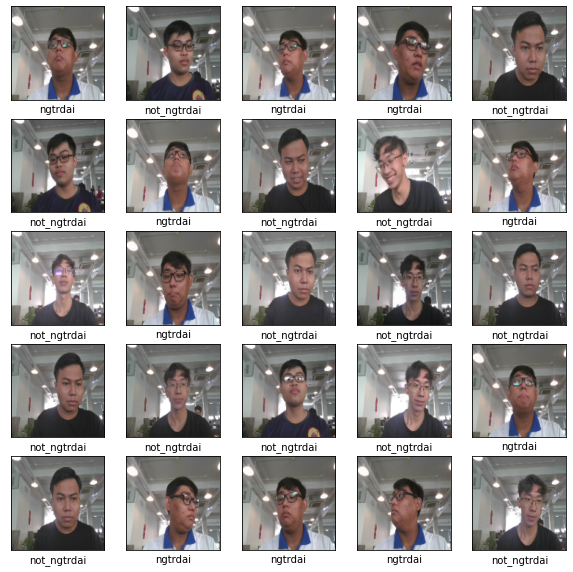

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(labels[y_train[i][0]])
plt.show()

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [10]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [11]:
# Create model using Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(128,128,3)))
model.add(layers.Conv2D(24, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPool2D((2,2), strides=(2,2)))

model.add(layers.Conv2D(8, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPool2D((2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2))
model.add(layers.Softmax())

In [12]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [13]:
# Training
history = model.fit(X_train, y_train, epochs=45,validation_data=(X_test, y_test), verbose=1)
model.save("model.h5")

Epoch 1/45
8/8 [==============================] - 2s 247ms/step - loss: 0.6218 - accuracy: 0.6167 - val_loss: 0.2072 - val_accuracy: 1.0000
Epoch 2/45
8/8 [==============================] - 2s 235ms/step - loss: 0.1447 - accuracy: 0.9792 - val_loss: 0.0583 - val_accuracy: 1.0000
Epoch 3/45
8/8 [==============================] - 2s 200ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 4/45
8/8 [==============================] - 2s 200ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/45
8/8 [==============================] - 2s 208ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/45
8/8 [==============================] - 2s 192ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 8.4617e-04 - val_accuracy: 1.0000
Epoch 7/45
8/8 [==============================] - 2s 196ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 5.7801e-04 - val_accuracy: 1.0000
Epoch 8/45
8

In [14]:
score = model.evaluate(X_test, y_test, verbose=2)
print("Loss = ", score[0])
print("Accuracy = ", score[1])

2/2 - 0s - loss: 1.1741e-04 - accuracy: 1.0000 - 111ms/epoch - 56ms/step
Loss =  0.00011741168418666348
Accuracy =  1.0


In [21]:
modelH5 = tf.keras.models.load_model("model.h5")

1/1 [==============================] - 0s 19ms/step


'not_ngtrdai'

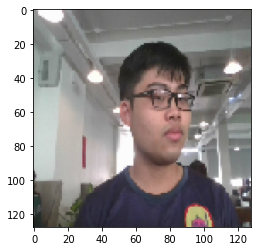

In [24]:
img = load_img("./datasets/not_ngtrdai/not_ngtrdai_0.png", target_size=(128,128))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,128,128,3)
img = img.astype('float32')
img = img / 255.0
labels[np.argmax(modelH5.predict(img), axis=1)[0]]